Tobigs 16기 김윤혜

# NLP 기초 Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 8주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [3]:
spam = pd.read_csv('/content/drive/MyDrive/Tobigs/spam.csv')

In [4]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

## Preprocessing

In [5]:
len(spam)

5572

In [6]:
spam['v1'] = spam['v1'].replace(['ham','spam'],[0,1])

spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [7]:
# 결측 확인
spam.isnull().values.any()

False

In [8]:
# 중복 확인
spam['v2'].nunique(), spam['v1'].nunique()

(5169, 2)

In [10]:
# v2의 중복 제거
spam.drop_duplicates(subset=['v2'], inplace=True)
print(len(spam))

5169


중복 제거 후 5572 -> 5169

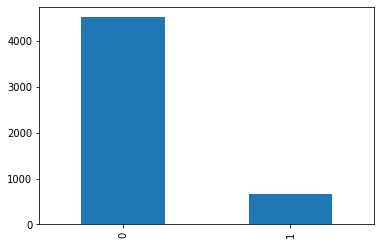

In [11]:
spam['v1'].value_counts().plot(kind='bar');

In [12]:
print(spam.groupby('v1').size().reset_index(name='count'))

   v1  count
0   0   4516
1   1    653


데이터가 스팸 메일이 아닌 정상 메일에 편중되어있음을 확인했다.

In [13]:
# 특수 기호, 주소 등 제거 (cleansing)
def cleansing(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' 
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' 
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)' 
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'     
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text.lower()

In [15]:
import re

clean_contents = []
for text in spam['v2']:
    a = cleansing(str(text))
    clean_contents.append(a)
clean_contents[5]

'freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send å150 to rcv'

## Tokenizing


In [16]:
import nltk
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
import webbrowser
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np

In [17]:
nltk.download('all') # nltk==3.2.5

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [18]:
stemmer = SnowballStemmer("english")
stop_words = stopwords.words('english')

In [19]:
def preprocess(cleaned_contents):
    cleaned_tokens=[]
    for string in cleaned_contents:
        s = []
        tokens = word_tokenize(string)
        for word in tokens:
            if word not in stop_words:
                w = stemmer.stem(word)
                s.append(w)
        cleaned_tokens.append(s)
    # preprocessed_tokens = [word_tokenize(s) for s in cleaned_tokens]
    return cleaned_tokens

In [20]:
f_spam = preprocess(clean_contents)
f_spam[5]

['freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'å150',
 'rcv']

## 명사 추출

In [21]:
### Pos tagging
NN_pos = []
for words in f_spam:
  tokens_pos = nltk.pos_tag(words)
  NN_pos.append(tokens_pos)
print(NN_pos)

[[('go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazi', 'NN'), ('avail', 'NN'), ('bugi', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('e', 'VBP'), ('buffet', 'JJ'), ('cine', 'NN'), ('got', 'VBD'), ('amor', 'JJ'), ('wat', 'NN')], [('ok', 'JJ'), ('lar', 'JJ'), ('joke', 'NN'), ('wif', 'NN'), ('u', 'JJ'), ('oni', 'NN')], [('free', 'JJ'), ('entri', 'NN'), ('2', 'CD'), ('wkli', 'NN'), ('comp', 'NN'), ('win', 'VBP'), ('fa', 'JJ'), ('cup', 'NN'), ('final', 'JJ'), ('tkts', 'NN'), ('21st', 'CD'), ('may', 'MD'), ('2005', 'CD'), ('text', 'NN'), ('fa', 'NN'), ('87121', 'CD'), ('receiv', 'NN'), ('entri', 'NN'), ('questionstd', 'NN'), ('txt', 'NN'), ('ratetc', 'NN'), ('appli', 'VBZ'), ('08452810075over18', 'CD')], [('u', 'JJ'), ('dun', 'NNS'), ('say', 'VBP'), ('earli', 'JJ'), ('hor', 'NN'), ('u', 'JJ'), ('c', 'JJ'), ('alreadi', 'NNS'), ('say', 'VBP')], [('nah', 'JJ'), ('dont', 'NN'), ('think', 'VBP'), ('goe', 'JJ'), ('usf', 'JJ'), ('live', 'VBP'), ('around', 'IN'), ('thou

In [22]:
NN_words = []
for words in NN_pos:
  NN = []
  for word, pos in words:
      if 'NN' in pos:
          NN.append(word)
  NN_words.append(NN)
print(NN_words)
print(len(NN_words))

[['point', 'crazi', 'avail', 'bugi', 'world', 'la', 'cine', 'wat'], ['joke', 'wif', 'oni'], ['entri', 'wkli', 'comp', 'cup', 'tkts', 'text', 'fa', 'receiv', 'entri', 'questionstd', 'txt', 'ratetc'], ['dun', 'hor', 'alreadi'], ['dont'], ['freemsg', 'hey', 'week', 'word', 'id', 'fun', 'xxx', 'std', 'chgs', 'å150', 'rcv'], ['treat', 'aid', 'patent'], ['request', 'mell', 'mell', 'minnaminungint', 'nurungu', 'caller', 'press', 'copi', 'friend', 'callertun'], ['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'å900', 'claim', 'call', 'claim', 'code', 'hour'], ['month', 'r', 'entitl', 'colour', 'mobil', 'camera', 'call', 'mobil', 'co'], ['im', 'gon', 'home', 'talk', 'stuff', 'anymor', 'k', 'cri', 'today'], ['chanc', 'cash', 'pound', 'txt', 'cost', 'tsandc', 'appli', 'repli', 'info'], ['week', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', 'tc', 'wwwdbuknet', 'lccltd', 'pobox'], ['search', 'right', 'word', 'breather', 'promis', 'wont', 'help', 'promis', 'wonder', 'bless',

## 워드클라우드

In [23]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

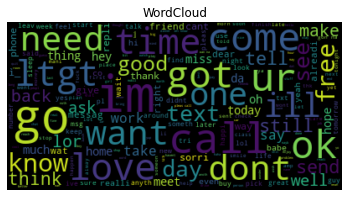

In [24]:
text = ''
for words in f_spam:
  for word in words:
      text = text +' '+ word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.title('WordCloud')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

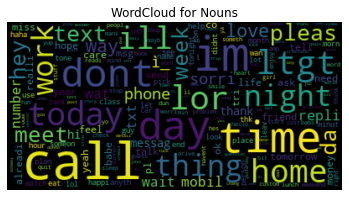

In [25]:
noun_text = ''
for words in NN_words:
  for word in words:
      noun_text = noun_text +' '+ word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.title('WordCloud for Nouns')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [26]:
! pip install glove-python-binary

     |████████████████████████████████| 948 kB 4.2 MB/s 


In [27]:
import gensim
from gensim.models import Word2Vec, FastText
from glove import Corpus, Glove
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
class TfidfEmbeddingVectorizer:
    def __init__(self, word2vec):
        self.word2vec = word2vec

    def transform(self, X):
        tfidf = TfidfVectorizer(analyzer = lambda x : x) 
        tfidf.fit(X)
        max_idf = max(tfidf.idf_) 
        word2weight = defaultdict(lambda : max_idf, [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()]) 

        array_list =[]
        for words in X:
            array_list.append(np.array(np.mean([self.word2vec[w]*word2weight[w] for w in words if w in self.word2vec] or [np.zeros(100)], axis = 0)))
        return(array_list)

In [29]:
print(len(f_spam), len(spam['v1']))

5169 5169


In [30]:
# train, test 데이터 나누기
from sklearn.model_selection import train_test_split  # 버전에 따라 다름
X_train, X_test, y_train, y_test = train_test_split(f_spam, spam['v1'], test_size = 0.2, random_state = 2021)

print(len(X_train), len(X_test))

4135 1034


### 1) CBOW

In [31]:
cb_model = Word2Vec(X_train, size=100, window=10, min_count=10, workers=4, sg=0)

In [32]:
tf_CBOW = TfidfEmbeddingVectorizer(cb_model)

In [33]:
train_cb = tf_CBOW.transform(X_train)
test_cb = tf_CBOW.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [53]:
print("money" in cb_model.wv.vocab)

True


In [55]:
cb_model.similarity('dinner', 'eat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9997093

In [56]:
cb_model.most_similar(positive=["money"], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('thing', 0.9998663663864136),
 ('pls', 0.9998631477355957),
 ('today', 0.9998626708984375),
 ('say', 0.9998588562011719),
 ('need', 0.9998579621315002),
 ('want', 0.9998571872711182),
 ('take', 0.9998569488525391),
 ('go', 0.9998567700386047),
 ('like', 0.9998565912246704),
 ('would', 0.9998553395271301)]

### 2) skip-gram

In [34]:
sg_model = Word2Vec(X_train, size=100, window=10, min_count=10, workers=4, sg=1)

tf_SG = TfidfEmbeddingVectorizer(sg_model)

train_sg = tf_SG.transform(X_train)
test_sg = tf_SG.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [52]:
print("money" in sg_model.wv.vocab)

True


In [54]:
sg_model.similarity('dinner', 'eat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.99567837

In [57]:
sg_model.most_similar(positive=["money"], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lol', 0.9987738728523254),
 ('til', 0.9986300468444824),
 ('wont', 0.9985642433166504),
 ('worri', 0.9985405802726746),
 ('happen', 0.9983564615249634),
 ('though', 0.9982964992523193),
 ('place', 0.9981997013092041),
 ('enough', 0.9980530142784119),
 ('someth', 0.9980415105819702),
 ('thought', 0.9979659914970398)]

### 3) FastText

In [37]:
ft_model = FastText(size=100, window=2)
ft_model.build_vocab(f_spam)
ft_model.train(
    f_spam, epochs=200,
    total_examples=ft_model.corpus_count, total_words=ft_model.corpus_total_words
)

In [43]:
tf_FT = TfidfEmbeddingVectorizer(ft_model)

train_ft = tf_FT.transform(X_train)
test_ft = tf_FT.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [40]:
print("money" in ft_model.wv.vocab)

True


In [41]:
ft_model.similarity('dinner', 'eat')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.21570879

In [42]:
ft_model.most_similar(positive=["money"], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('honey', 0.6002026796340942),
 ('mon', 0.4690169095993042),
 ('sure', 0.3675956130027771),
 ('straight', 0.3665646016597748),
 ('omg', 0.35673367977142334),
 ('aight', 0.3544064164161682),
 ('month', 0.35428446531295776),
 ('might', 0.34168773889541626),
 ('carlo', 0.3352285623550415),
 ('smoke', 0.3301534652709961)]

#### 명사만 학습

In [ ]:
model = FastText(size=100, window=2)
model.build_vocab(NN_words)
model.train(
    NN_words, epochs=100,
    total_examples=model.corpus_count, total_words=model.corpus_total_words
)

In [ ]:
model.similarity('money', 'prize')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.16506496

In [ ]:
model.most_similar(positive=["money"], topn=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('honey', 0.8209248185157776),
 ('mon', 0.6663656234741211),
 ('month', 0.5317960977554321),
 ('monday', 0.46863093972206116),
 ('coffe', 0.4599235951900482),
 ('shit', 0.42688703536987305),
 ('oh', 0.4139658510684967),
 ('mo', 0.4130364656448364),
 ('bb', 0.40723928809165955),
 ('india', 0.4020490050315857)]

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

## Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB

#### 1. CBOW

In [ ]:
nb = GaussianNB()
y_pred = nb.fit(train_cb, y_train).predict(test_cb)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.37      0.54       893
           1       0.18      0.89      0.30       141

    accuracy                           0.44      1034
   macro avg       0.57      0.63      0.42      1034
weighted avg       0.85      0.44      0.50      1034



#### 2. skip-gram

In [ ]:
nb = GaussianNB()
y_pred = nb.fit(train_sg, y_train).predict(test_sg)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       893
           1       0.76      0.82      0.79       141

    accuracy                           0.94      1034
   macro avg       0.87      0.89      0.88      1034
weighted avg       0.94      0.94      0.94      1034



CBOW와 skip-gram을 비교했을 때, skip-gram의 성능이 월등히 좋다.

#### 3. FastText

In [ ]:
nb = GaussianNB()
y_pred = nb.fit(train_ft, y_train).predict(test_ft)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       893
           1       0.89      0.92      0.91       141

    accuracy                           0.97      1034
   macro avg       0.94      0.95      0.95      1034
weighted avg       0.97      0.97      0.97      1034



FastText(acc:0.97) > skip-gram(0.94) > CBOW(0.44) 순으로 성능이 좋았다. <br>
최종 임베딩 모델: **FastText**

## Visulization 
* 최종 임베딩 기법 FastText 시각화

In [44]:
from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib as mpl

In [45]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False 

In [76]:
words = []
for word in X_train:
  words += word

In [77]:
# 가장 빈도수가 높은 800개의 단어를 추출합니다. 
freq_list = Counter(words).most_common(800)
vocab = [i[0] for i in freq_list if len(i[0])>1]

# 2차원으로 축소합니다. 
tsne = TSNE(perplexity=30,n_components=2, init='pca', n_iter=3500, random_state=12)

In [87]:
def tsne_2d(title, tsne, X):
    # 100 => 2차원
    X_tsne = tsne.fit_transform(X[:300,:])
    df = pd.DataFrame(X_tsne, index=vocab[:300], columns=['x', 'y'])
    
    %matplotlib inline
    fig = plt.figure()
    fig.set_size_inches(20, 10)
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(df["x"], df["y"])
    for word, pos in list(df.iterrows()):
        ax.annotate(word, pos, fontsize=12) #, fontproperties=prop)
    plt.title(title)
    plt.show()

### FastText

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


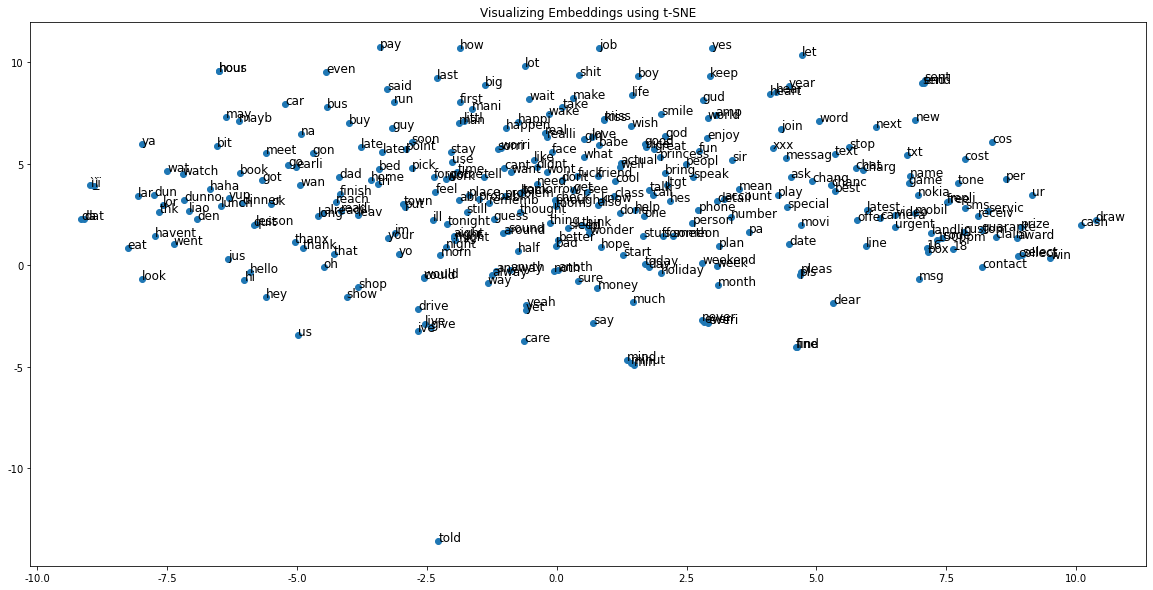

In [88]:
tsne_2d('Visualizing Embeddings using t-SNE', tsne, ft_model[vocab])

#### 명사만 학습한 경우

In [ ]:
NNs = []
for word in NN_words:
  NNs += word

NN_freq_list = Counter(NNs).most_common(800)
NN_vocab = [i[0] for i in NN_freq_list if len(i[0])>1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


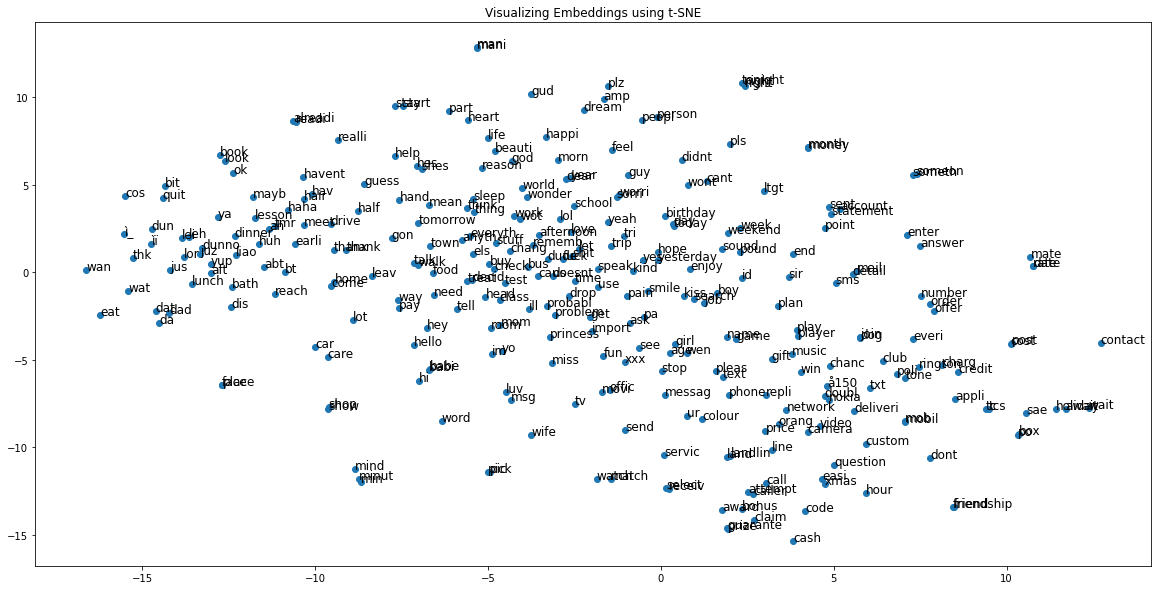

In [ ]:
# FastText - 명사
tsne_2d('Visualizing Embeddings using t-SNE', tsne, ft_model[NN_vocab], NN_vocab)